# Convolutional Neural Network (CNN)

**Learning Objectives**
  1. We will learn how to configure our CNN to process inputs of CIFAR images
  2. We will learn how to compile and train the CNN model
  3. We will learn how to evaluate the CNN model


## Introduction
This notebook demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this notebook uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training our model will take just a few lines of code.

Each learning objective will correspond to a __#TODO__ in the [student lab notebook](https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/machine_learning/deepdive2/image_understanding/labs/cnn.ipynb) -- try to complete that notebook first before reviewing this solution notebook.


In [ ]:
# Use the chown command to change the ownership of the repository.
!sudo chown -R jupyter:jupyter /home/jupyter/training-data-analyst

## Import TensorFlow

In [2]:
# Importing necessary TF version and modules
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

This notebook uses TF2.x. Please check your tensorflow version using the cell below.

In [ ]:
# Show the currently installed version of TensorFlow
print(tf.__version__)

2.3.1


## Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
# Download the CIFAR10 dataset.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

     8192/170498071 [..............................] - ETA: 1:01:27

    40960/170498071 [..............................] - ETA: 24:38  

    90112/170498071 [..............................] - ETA: 16:48

   204800/170498071 [..............................] - ETA: 9:51 

   434176/170498071 [..............................] - ETA: 5:48

   876544/170498071 [..............................] - ETA: 3:26

  1777664/170498071 [..............................] - ETA: 1:58

  3579904/170498071 [..............................] - ETA: 1:06

  6397952/170498071 [>.............................] - ETA: 37s 

  6725632/170498071 [>.............................] - ETA: 39s

  9379840/170498071 [>.............................] - ETA: 28s

  9854976/170498071 [>.............................] - ETA: 29s

 12214272/170498071 [=>............................] - ETA: 23s

 12984320/170498071 [=>............................] - ETA: 23s

 15278080/170498071 [=>............................] - ETA: 20s

 16130048/170498071 [=>............................] - ETA: 20s

 18456576/170498071 [==>...........................] - ETA: 18s

 19275776/170498071 [==>...........................] - ETA: 18s

 21716992/170498071 [==>...........................] - ETA: 16s

 22044672/170498071 [==>...........................] - ETA: 16s

 24649728/170498071 [===>..........................] - ETA: 15s

 25174016/170498071 [===>..........................] - ETA: 15s

 27746304/170498071 [===>..........................] - ETA: 14s

 28319744/170498071 [===>..........................] - ETA: 14s

 30760960/170498071 [====>.........................] - ETA: 13s

 31449088/170498071 [====>.........................] - ETA: 13s

 33603584/170498071 [====>.........................] - ETA: 12s

 34578432/170498071 [=====>........................] - ETA: 12s

 36675584/170498071 [=====>........................] - ETA: 11s

 37724160/170498071 [=====>........................] - ETA: 11s

 39903232/170498071 [======>.......................] - ETA: 11s

 40853504/170498071 [======>.......................] - ETA: 11s

 42950656/170498071 [======>.......................] - ETA: 10s

 43982848/170498071 [======>.......................] - ETA: 10s

 45850624/170498071 [=======>......................] - ETA: 10s

 47095808/170498071 [=======>......................] - ETA: 10s

 48373760/170498071 [=======>......................] - ETA: 10s

 50241536/170498071 [=======>......................] - ETA: 9s 

 51208192/170498071 [========>.....................] - ETA: 9s

 53157888/170498071 [========>.....................] - ETA: 9s

 55287808/170498071 [========>.....................] - ETA: 9s

 56254464/170498071 [========>.....................] - ETA: 8s

 56303616/170498071 [========>.....................] - ETA: 9s

 58122240/170498071 [=========>....................] - ETA: 8s

 59367424/170498071 [=========>....................] - ETA: 8s

 59416576/170498071 [=========>....................] - ETA: 8s

 61218816/170498071 [=========>....................] - ETA: 8s

 62480384/170498071 [=========>....................] - ETA: 8s

 62513152/170498071 [=========>....................] - ETA: 8s

 64299008/170498071 [==========>...................] - ETA: 8s

 65576960/170498071 [==========>...................] - ETA: 7s

 65626112/170498071 [==========>...................] - ETA: 8s

 67428352/170498071 [==========>...................] - ETA: 7s

 68706304/170498071 [===========>..................] - ETA: 7s

 68722688/170498071 [===========>..................] - ETA: 7s

 70115328/170498071 [===========>..................] - ETA: 7s

 71540736/170498071 [===========>..................] - ETA: 7s

 73498624/170498071 [===========>..................] - ETA: 7s

 74670080/170498071 [============>.................] - ETA: 7s

 76472320/170498071 [============>.................] - ETA: 6s

 77815808/170498071 [============>.................] - ETA: 6s

 79503360/170498071 [============>.................] - ETA: 6s

 80945152/170498071 [=============>................] - ETA: 6s

 82534400/170498071 [=============>................] - ETA: 6s

 84074496/170498071 [=============>................] - ETA: 6s

 85630976/170498071 [==============>...............] - ETA: 6s

 87220224/170498071 [==============>...............] - ETA: 5s

 89006080/170498071 [==============>...............] - ETA: 5s

 90349568/170498071 [==============>...............] - ETA: 5s

 91332608/170498071 [===============>..............] - ETA: 5s

 93478912/170498071 [===============>..............] - ETA: 5s

 94445568/170498071 [===============>..............] - ETA: 5s

 96624640/170498071 [================>.............] - ETA: 5s

 97607680/170498071 [================>.............] - ETA: 5s

 99377152/170498071 [================>.............] - ETA: 5s

100802560/170498071 [================>.............] - ETA: 4s

102473728/170498071 [=================>............] - ETA: 4s

102522880/170498071 [=================>............] - ETA: 4s

103915520/170498071 [=================>............] - ETA: 4s

105570304/170498071 [=================>............] - ETA: 4s

105635840/170498071 [=================>............] - ETA: 4s

107012096/170498071 [=================>............] - ETA: 4s

108699648/170498071 [==================>...........] - ETA: 4s

108732416/170498071 [==================>...........] - ETA: 4s

110108672/170498071 [==================>...........] - ETA: 4s

111812608/170498071 [==================>...........] - ETA: 4s

111845376/170498071 [==================>...........] - ETA: 4s

113238016/170498071 [==================>...........] - ETA: 3s

114925568/170498071 [===================>..........] - ETA: 3s

114958336/170498071 [===================>..........] - ETA: 3s

115974144/170498071 [===================>..........] - ETA: 3s

118038528/170498071 [===================>..........] - ETA: 3s

118071296/170498071 [===================>..........] - ETA: 3s

118874112/170498071 [===================>..........] - ETA: 3s

121135104/170498071 [====================>.........] - ETA: 3s

121184256/170498071 [====================>.........] - ETA: 3s

121970688/170498071 [====================>.........] - ETA: 3s

124231680/170498071 [====================>.........] - ETA: 3s

124297216/170498071 [====================>.........] - ETA: 3s

125083648/170498071 [=====================>........] - ETA: 3s

127082496/170498071 [=====================>........] - ETA: 2s

128344064/170498071 [=====================>........] - ETA: 2s

130211840/170498071 [=====================>........] - ETA: 2s

131424256/170498071 [======================>.......] - ETA: 2s

133357568/170498071 [======================>.......] - ETA: 2s

134586368/170498071 [======================>.......] - ETA: 2s

136503296/170498071 [=======================>......] - ETA: 2s

137699328/170498071 [=======================>......] - ETA: 2s

139632640/170498071 [=======================>......] - ETA: 2s

140795904/170498071 [=======================>......] - ETA: 1s

142761984/170498071 [========================>.....] - ETA: 1s

143515648/170498071 [========================>.....] - ETA: 1s

145858560/170498071 [========================>.....] - ETA: 1s

146628608/170498071 [========================>.....] - ETA: 1s

148938752/170498071 [=========================>....] - ETA: 1s

149725184/170498071 [=========================>....] - ETA: 1s

151707648/170498071 [=========================>....] - ETA: 1s

152805376/170498071 [=========================>....] - ETA: 1s

154820608/170498071 [==========================>...] - ETA: 1s

155017216/170498071 [==========================>...] - ETA: 1s

156147712/170498071 [==========================>...] - ETA: 0s

157933568/170498071 [==========================>...] - ETA: 0s

158130176/170498071 [==========================>...] - ETA: 0s

159244288/170498071 [===========================>..] - ETA: 0s

161079296/170498071 [===========================>..] - ETA: 0s

162111488/170498071 [===========================>..] - ETA: 0s

164192256/170498071 [===========================>..] - ETA: 0s

164306944/170498071 [===========================>..] - ETA: 0s

165453824/170498071 [============================>.] - ETA: 0s

167305216/170498071 [============================>.] - ETA: 0s

167436288/170498071 [============================>.] - ETA: 0s

168206336/170498071 [============================>.] - ETA: 0s

170418176/170498071 [============================>.] - ETA: 0s

170500096/170498071 [==============================] - 11s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


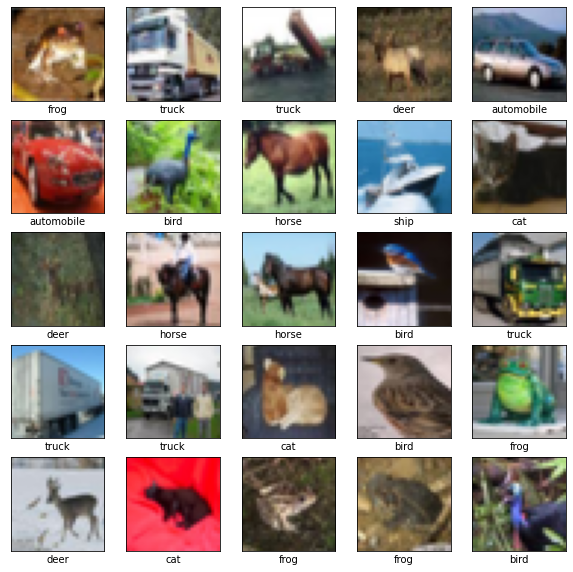

In [4]:
# Plot the first 25 images and display the class name below each image.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to our first layer.


In [5]:
# TODO 1 - Here we are configuring our CNN to process inputs of CIFAR images.
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of our model so far.

In [6]:
# Now, print a useful summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top
To complete our model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs and a softmax activation.

In [7]:
# Here, the model.add() method adds a layer instance incrementally for a sequential model.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of our model.

In [8]:
# Print a useful summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

As you can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

## Compile and train the model

In [9]:
# TODO 2 - Here we are compiling and training the model.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


   1/1563 [..............................] - ETA: 0s - loss: 2.3079 - accuracy: 0.1250

  20/1563 [..............................] - ETA: 3s - loss: 2.2957 - accuracy: 0.1172

  41/1563 [..............................] - ETA: 3s - loss: 2.2461 - accuracy: 0.1448

  62/1563 [>.............................] - ETA: 3s - loss: 2.1993 - accuracy: 0.1638

  83/1563 [>.............................] - ETA: 3s - loss: 2.1515 - accuracy: 0.1845

 104/1563 [>.............................] - ETA: 3s - loss: 2.1105 - accuracy: 0.2025

 125/1563 [=>............................] - ETA: 3s - loss: 2.0820 - accuracy: 0.2173

 146/1563 [=>............................] - ETA: 3s - loss: 2.0518 - accuracy: 0.2297

 167/1563 [==>...........................] - ETA: 3s - loss: 2.0315 - accuracy: 0.2423

 188/1563 [==>...........................] - ETA: 3s - loss: 2.0142 - accuracy: 0.2512

 210/1563 [===>..........................] - ETA: 3s - loss: 1.9956 - accuracy: 0.2589

 233/1563 [===>..........................] - ETA: 3s - loss: 1.9759 - accuracy: 0.2654

 255/1563 [===>..........................] - ETA: 3s - loss: 1.9601 - accuracy: 0.2741

 277/1563 [====>.........................] - ETA: 3s - loss: 1.9496 - accuracy: 0.2767

 299/1563 [====>.........................] - ETA: 3s - loss: 1.9303 - accuracy: 0.2830

 322/1563 [=====>........................] - ETA: 2s - loss: 1.9145 - accuracy: 0.2893

 345/1563 [=====>........................] - ETA: 2s - loss: 1.9004 - accuracy: 0.2947

 367/1563 [======>.......................] - ETA: 2s - loss: 1.8852 - accuracy: 0.2993

 390/1563 [======>.......................] - ETA: 2s - loss: 1.8744 - accuracy: 0.3042

 413/1563 [======>.......................] - ETA: 2s - loss: 1.8590 - accuracy: 0.3097

 436/1563 [=======>......................] - ETA: 2s - loss: 1.8458 - accuracy: 0.3167

 459/1563 [=======>......................] - ETA: 2s - loss: 1.8314 - accuracy: 0.3225

 482/1563 [========>.....................] - ETA: 2s - loss: 1.8206 - accuracy: 0.3260

 504/1563 [========>.....................] - ETA: 2s - loss: 1.8095 - accuracy: 0.3298

 527/1563 [=========>....................] - ETA: 2s - loss: 1.7998 - accuracy: 0.3343

 549/1563 [=========>....................] - ETA: 2s - loss: 1.7894 - accuracy: 0.3385

 572/1563 [=========>....................] - ETA: 2s - loss: 1.7771 - accuracy: 0.3439

 595/1563 [==========>...................] - ETA: 2s - loss: 1.7708 - accuracy: 0.3465

 618/1563 [==========>...................] - ETA: 2s - loss: 1.7599 - accuracy: 0.3506

 641/1563 [===========>..................] - ETA: 2s - loss: 1.7514 - accuracy: 0.3534

 664/1563 [===========>..................] - ETA: 2s - loss: 1.7433 - accuracy: 0.3564

 687/1563 [============>.................] - ETA: 2s - loss: 1.7359 - accuracy: 0.3599

 709/1563 [============>.................] - ETA: 1s - loss: 1.7275 - accuracy: 0.3631

 731/1563 [=============>................] - ETA: 1s - loss: 1.7192 - accuracy: 0.3668

 754/1563 [=============>................] - ETA: 1s - loss: 1.7119 - accuracy: 0.3699

 777/1563 [=============>................] - ETA: 1s - loss: 1.7043 - accuracy: 0.3725

 799/1563 [==============>...............] - ETA: 1s - loss: 1.6972 - accuracy: 0.3754

 820/1563 [==============>...............] - ETA: 1s - loss: 1.6920 - accuracy: 0.3772

 841/1563 [===============>..............] - ETA: 1s - loss: 1.6849 - accuracy: 0.3802

 862/1563 [===============>..............] - ETA: 1s - loss: 1.6774 - accuracy: 0.3830

 884/1563 [===============>..............] - ETA: 1s - loss: 1.6704 - accuracy: 0.3858

 906/1563 [================>.............] - ETA: 1s - loss: 1.6646 - accuracy: 0.3883

 929/1563 [================>.............] - ETA: 1s - loss: 1.6584 - accuracy: 0.3910

 951/1563 [=================>............] - ETA: 1s - loss: 1.6527 - accuracy: 0.3934

 974/1563 [=================>............] - ETA: 1s - loss: 1.6468 - accuracy: 0.3957

 997/1563 [==================>...........] - ETA: 1s - loss: 1.6425 - accuracy: 0.3977

1019/1563 [==================>...........] - ETA: 1s - loss: 1.6379 - accuracy: 0.3996

1041/1563 [==================>...........] - ETA: 1s - loss: 1.6316 - accuracy: 0.4024

1064/1563 [===================>..........] - ETA: 1s - loss: 1.6260 - accuracy: 0.4045

1086/1563 [===================>..........] - ETA: 1s - loss: 1.6224 - accuracy: 0.4061

1109/1563 [====================>.........] - ETA: 1s - loss: 1.6165 - accuracy: 0.4086

1132/1563 [====================>.........] - ETA: 0s - loss: 1.6111 - accuracy: 0.4112

1155/1563 [=====================>........] - ETA: 0s - loss: 1.6058 - accuracy: 0.4131

1177/1563 [=====================>........] - ETA: 0s - loss: 1.5996 - accuracy: 0.4155

1200/1563 [======================>.......] - ETA: 0s - loss: 1.5947 - accuracy: 0.4174

1222/1563 [======================>.......] - ETA: 0s - loss: 1.5909 - accuracy: 0.4184

1244/1563 [======================>.......] - ETA: 0s - loss: 1.5873 - accuracy: 0.4202

1266/1563 [=======================>......] - ETA: 0s - loss: 1.5825 - accuracy: 0.4219

1289/1563 [=======================>......] - ETA: 0s - loss: 1.5772 - accuracy: 0.4239

1312/1563 [========================>.....] - ETA: 0s - loss: 1.5722 - accuracy: 0.4259

1334/1563 [========================>.....] - ETA: 0s - loss: 1.5682 - accuracy: 0.4274

1357/1563 [=========================>....] - ETA: 0s - loss: 1.5644 - accuracy: 0.4290

1380/1563 [=========================>....] - ETA: 0s - loss: 1.5607 - accuracy: 0.4303

1403/1563 [=========================>....] - ETA: 0s - loss: 1.5562 - accuracy: 0.4320

1426/1563 [==========================>...] - ETA: 0s - loss: 1.5517 - accuracy: 0.4339

1449/1563 [==========================>...] - ETA: 0s - loss: 1.5468 - accuracy: 0.4360

1471/1563 [===========================>..] - ETA: 0s - loss: 1.5425 - accuracy: 0.4379

1493/1563 [===========================>..] - ETA: 0s - loss: 1.5382 - accuracy: 0.4400

1516/1563 [============================>.] - ETA: 0s - loss: 1.5350 - accuracy: 0.4415

1538/1563 [============================>.] - ETA: 0s - loss: 1.5325 - accuracy: 0.4425

1560/1563 [============================>.] - ETA: 0s - loss: 1.5299 - accuracy: 0.4439

1563/1563 [==============================] - 4s 3ms/step - loss: 1.5295 - accuracy: 0.4441 - val_loss: 1.3232 - val_accuracy: 0.5301


Epoch 2/10
   1/1563 [..............................] - ETA: 0s - loss: 1.6840 - accuracy: 0.4688

  23/1563 [..............................] - ETA: 3s - loss: 1.2759 - accuracy: 0.5503

  46/1563 [..............................] - ETA: 3s - loss: 1.2481 - accuracy: 0.5489

  68/1563 [>.............................] - ETA: 3s - loss: 1.2571 - accuracy: 0.5464

  90/1563 [>.............................] - ETA: 3s - loss: 1.2516 - accuracy: 0.5479

 113/1563 [=>............................] - ETA: 3s - loss: 1.2364 - accuracy: 0.5517

 135/1563 [=>............................] - ETA: 3s - loss: 1.2403 - accuracy: 0.5537

 157/1563 [==>...........................] - ETA: 3s - loss: 1.2390 - accuracy: 0.5555

 179/1563 [==>...........................] - ETA: 3s - loss: 1.2349 - accuracy: 0.5587

 201/1563 [==>...........................] - ETA: 3s - loss: 1.2327 - accuracy: 0.5619

 224/1563 [===>..........................] - ETA: 3s - loss: 1.2386 - accuracy: 0.5598

 246/1563 [===>..........................] - ETA: 3s - loss: 1.2380 - accuracy: 0.5597

 268/1563 [====>.........................] - ETA: 2s - loss: 1.2322 - accuracy: 0.5638

 291/1563 [====>.........................] - ETA: 2s - loss: 1.2277 - accuracy: 0.5646

 314/1563 [=====>........................] - ETA: 2s - loss: 1.2295 - accuracy: 0.5632

 337/1563 [=====>........................] - ETA: 2s - loss: 1.2254 - accuracy: 0.5648

 360/1563 [=====>........................] - ETA: 2s - loss: 1.2253 - accuracy: 0.5657

 383/1563 [======>.......................] - ETA: 2s - loss: 1.2274 - accuracy: 0.5641

 405/1563 [======>.......................] - ETA: 2s - loss: 1.2239 - accuracy: 0.5660

 428/1563 [=======>......................] - ETA: 2s - loss: 1.2230 - accuracy: 0.5655

 450/1563 [=======>......................] - ETA: 2s - loss: 1.2229 - accuracy: 0.5653

 471/1563 [========>.....................] - ETA: 2s - loss: 1.2221 - accuracy: 0.5657

 492/1563 [========>.....................] - ETA: 2s - loss: 1.2222 - accuracy: 0.5663

 513/1563 [========>.....................] - ETA: 2s - loss: 1.2263 - accuracy: 0.5646

 535/1563 [=========>....................] - ETA: 2s - loss: 1.2255 - accuracy: 0.5654

 558/1563 [=========>....................] - ETA: 2s - loss: 1.2228 - accuracy: 0.5663

 581/1563 [==========>...................] - ETA: 2s - loss: 1.2198 - accuracy: 0.5663

 604/1563 [==========>...................] - ETA: 2s - loss: 1.2186 - accuracy: 0.5669

 626/1563 [===========>..................] - ETA: 2s - loss: 1.2185 - accuracy: 0.5673

 648/1563 [===========>..................] - ETA: 2s - loss: 1.2167 - accuracy: 0.5677

 671/1563 [===========>..................] - ETA: 2s - loss: 1.2160 - accuracy: 0.5684

 694/1563 [============>.................] - ETA: 1s - loss: 1.2132 - accuracy: 0.5700

 716/1563 [============>.................] - ETA: 1s - loss: 1.2119 - accuracy: 0.5703

 738/1563 [=============>................] - ETA: 1s - loss: 1.2100 - accuracy: 0.5713

 760/1563 [=============>................] - ETA: 1s - loss: 1.2093 - accuracy: 0.5711

 783/1563 [==============>...............] - ETA: 1s - loss: 1.2079 - accuracy: 0.5719

 806/1563 [==============>...............] - ETA: 1s - loss: 1.2051 - accuracy: 0.5729

 829/1563 [==============>...............] - ETA: 1s - loss: 1.2027 - accuracy: 0.5739

 851/1563 [===============>..............] - ETA: 1s - loss: 1.2017 - accuracy: 0.5740

 874/1563 [===============>..............] - ETA: 1s - loss: 1.2025 - accuracy: 0.5737

 896/1563 [================>.............] - ETA: 1s - loss: 1.2004 - accuracy: 0.5744

 919/1563 [================>.............] - ETA: 1s - loss: 1.1998 - accuracy: 0.5746

 942/1563 [=================>............] - ETA: 1s - loss: 1.1996 - accuracy: 0.5750

 964/1563 [=================>............] - ETA: 1s - loss: 1.1972 - accuracy: 0.5756

 986/1563 [=================>............] - ETA: 1s - loss: 1.1961 - accuracy: 0.5761

1009/1563 [==================>...........] - ETA: 1s - loss: 1.1943 - accuracy: 0.5764

1031/1563 [==================>...........] - ETA: 1s - loss: 1.1934 - accuracy: 0.5772

1054/1563 [===================>..........] - ETA: 1s - loss: 1.1914 - accuracy: 0.5776

1076/1563 [===================>..........] - ETA: 1s - loss: 1.1910 - accuracy: 0.5781

1098/1563 [====================>.........] - ETA: 1s - loss: 1.1908 - accuracy: 0.5783

1121/1563 [====================>.........] - ETA: 1s - loss: 1.1907 - accuracy: 0.5785

1144/1563 [====================>.........] - ETA: 0s - loss: 1.1886 - accuracy: 0.5794

1167/1563 [=====================>........] - ETA: 0s - loss: 1.1874 - accuracy: 0.5799

1189/1563 [=====================>........] - ETA: 0s - loss: 1.1871 - accuracy: 0.5800

1212/1563 [======================>.......] - ETA: 0s - loss: 1.1859 - accuracy: 0.5803

1234/1563 [======================>.......] - ETA: 0s - loss: 1.1859 - accuracy: 0.5804

1254/1563 [=======================>......] - ETA: 0s - loss: 1.1840 - accuracy: 0.5813

1274/1563 [=======================>......] - ETA: 0s - loss: 1.1830 - accuracy: 0.5817

1295/1563 [=======================>......] - ETA: 0s - loss: 1.1823 - accuracy: 0.5821

1316/1563 [========================>.....] - ETA: 0s - loss: 1.1819 - accuracy: 0.5823

1337/1563 [========================>.....] - ETA: 0s - loss: 1.1809 - accuracy: 0.5826

1358/1563 [=========================>....] - ETA: 0s - loss: 1.1812 - accuracy: 0.5828

1379/1563 [=========================>....] - ETA: 0s - loss: 1.1799 - accuracy: 0.5833

1400/1563 [=========================>....] - ETA: 0s - loss: 1.1780 - accuracy: 0.5839

1422/1563 [==========================>...] - ETA: 0s - loss: 1.1767 - accuracy: 0.5841

1445/1563 [==========================>...] - ETA: 0s - loss: 1.1752 - accuracy: 0.5848

1468/1563 [===========================>..] - ETA: 0s - loss: 1.1743 - accuracy: 0.5851

1490/1563 [===========================>..] - ETA: 0s - loss: 1.1741 - accuracy: 0.5853

1512/1563 [============================>.] - ETA: 0s - loss: 1.1719 - accuracy: 0.5860

1534/1563 [============================>.] - ETA: 0s - loss: 1.1707 - accuracy: 0.5866

1557/1563 [============================>.] - ETA: 0s - loss: 1.1697 - accuracy: 0.5867

1563/1563 [==============================] - 4s 3ms/step - loss: 1.1693 - accuracy: 0.5868 - val_loss: 1.0998 - val_accuracy: 0.6113


Epoch 3/10
   1/1563 [..............................] - ETA: 0s - loss: 0.9021 - accuracy: 0.7188

  24/1563 [..............................] - ETA: 3s - loss: 1.0172 - accuracy: 0.6589

  46/1563 [..............................] - ETA: 3s - loss: 1.0417 - accuracy: 0.6474

  68/1563 [>.............................] - ETA: 3s - loss: 1.0266 - accuracy: 0.6457

  91/1563 [>.............................] - ETA: 3s - loss: 1.0174 - accuracy: 0.6480

 113/1563 [=>............................] - ETA: 3s - loss: 1.0280 - accuracy: 0.6399

 135/1563 [=>............................] - ETA: 3s - loss: 1.0325 - accuracy: 0.6387

 157/1563 [==>...........................] - ETA: 3s - loss: 1.0389 - accuracy: 0.6391

 179/1563 [==>...........................] - ETA: 3s - loss: 1.0471 - accuracy: 0.6360

 202/1563 [==>...........................] - ETA: 3s - loss: 1.0433 - accuracy: 0.6363

 225/1563 [===>..........................] - ETA: 3s - loss: 1.0514 - accuracy: 0.6333

 248/1563 [===>..........................] - ETA: 2s - loss: 1.0492 - accuracy: 0.6323

 270/1563 [====>.........................] - ETA: 2s - loss: 1.0505 - accuracy: 0.6314

 292/1563 [====>.........................] - ETA: 2s - loss: 1.0525 - accuracy: 0.6301

 314/1563 [=====>........................] - ETA: 2s - loss: 1.0498 - accuracy: 0.6316

 336/1563 [=====>........................] - ETA: 2s - loss: 1.0492 - accuracy: 0.6305

 358/1563 [=====>........................] - ETA: 2s - loss: 1.0480 - accuracy: 0.6300

 381/1563 [======>.......................] - ETA: 2s - loss: 1.0493 - accuracy: 0.6298

 404/1563 [======>.......................] - ETA: 2s - loss: 1.0497 - accuracy: 0.6289

 427/1563 [=======>......................] - ETA: 2s - loss: 1.0445 - accuracy: 0.6315

 450/1563 [=======>......................] - ETA: 2s - loss: 1.0410 - accuracy: 0.6333

 473/1563 [========>.....................] - ETA: 2s - loss: 1.0428 - accuracy: 0.6342

 496/1563 [========>.....................] - ETA: 2s - loss: 1.0385 - accuracy: 0.6355

 519/1563 [========>.....................] - ETA: 2s - loss: 1.0376 - accuracy: 0.6348

 541/1563 [=========>....................] - ETA: 2s - loss: 1.0366 - accuracy: 0.6355

 564/1563 [=========>....................] - ETA: 2s - loss: 1.0386 - accuracy: 0.6353

 586/1563 [==========>...................] - ETA: 2s - loss: 1.0399 - accuracy: 0.6346

 609/1563 [==========>...................] - ETA: 2s - loss: 1.0367 - accuracy: 0.6349

 631/1563 [===========>..................] - ETA: 2s - loss: 1.0351 - accuracy: 0.6358

 652/1563 [===========>..................] - ETA: 2s - loss: 1.0336 - accuracy: 0.6361

 672/1563 [===========>..................] - ETA: 2s - loss: 1.0337 - accuracy: 0.6358

 694/1563 [============>.................] - ETA: 1s - loss: 1.0328 - accuracy: 0.6364

 716/1563 [============>.................] - ETA: 1s - loss: 1.0298 - accuracy: 0.6372

 738/1563 [=============>................] - ETA: 1s - loss: 1.0282 - accuracy: 0.6379

 760/1563 [=============>................] - ETA: 1s - loss: 1.0296 - accuracy: 0.6373

 783/1563 [==============>...............] - ETA: 1s - loss: 1.0295 - accuracy: 0.6376

 805/1563 [==============>...............] - ETA: 1s - loss: 1.0295 - accuracy: 0.6374

 826/1563 [==============>...............] - ETA: 1s - loss: 1.0290 - accuracy: 0.6374

 847/1563 [===============>..............] - ETA: 1s - loss: 1.0291 - accuracy: 0.6374

 869/1563 [===============>..............] - ETA: 1s - loss: 1.0280 - accuracy: 0.6375

 891/1563 [================>.............] - ETA: 1s - loss: 1.0297 - accuracy: 0.6373

 913/1563 [================>.............] - ETA: 1s - loss: 1.0274 - accuracy: 0.6380

 935/1563 [================>.............] - ETA: 1s - loss: 1.0266 - accuracy: 0.6386

 957/1563 [=================>............] - ETA: 1s - loss: 1.0256 - accuracy: 0.6389

 979/1563 [=================>............] - ETA: 1s - loss: 1.0247 - accuracy: 0.6399

1001/1563 [==================>...........] - ETA: 1s - loss: 1.0248 - accuracy: 0.6402

1023/1563 [==================>...........] - ETA: 1s - loss: 1.0244 - accuracy: 0.6402

1045/1563 [===================>..........] - ETA: 1s - loss: 1.0243 - accuracy: 0.6405

1068/1563 [===================>..........] - ETA: 1s - loss: 1.0223 - accuracy: 0.6412

1090/1563 [===================>..........] - ETA: 1s - loss: 1.0221 - accuracy: 0.6410

1112/1563 [====================>.........] - ETA: 1s - loss: 1.0231 - accuracy: 0.6407

1134/1563 [====================>.........] - ETA: 0s - loss: 1.0231 - accuracy: 0.6408

1156/1563 [=====================>........] - ETA: 0s - loss: 1.0217 - accuracy: 0.6413

1178/1563 [=====================>........] - ETA: 0s - loss: 1.0227 - accuracy: 0.6413

1200/1563 [======================>.......] - ETA: 0s - loss: 1.0215 - accuracy: 0.6413

1223/1563 [======================>.......] - ETA: 0s - loss: 1.0208 - accuracy: 0.6416

1245/1563 [======================>.......] - ETA: 0s - loss: 1.0203 - accuracy: 0.6417

1267/1563 [=======================>......] - ETA: 0s - loss: 1.0198 - accuracy: 0.6418

1290/1563 [=======================>......] - ETA: 0s - loss: 1.0193 - accuracy: 0.6421

1313/1563 [========================>.....] - ETA: 0s - loss: 1.0185 - accuracy: 0.6424

1335/1563 [========================>.....] - ETA: 0s - loss: 1.0186 - accuracy: 0.6423

1357/1563 [=========================>....] - ETA: 0s - loss: 1.0180 - accuracy: 0.6427

1379/1563 [=========================>....] - ETA: 0s - loss: 1.0163 - accuracy: 0.6432

1401/1563 [=========================>....] - ETA: 0s - loss: 1.0152 - accuracy: 0.6436

1423/1563 [==========================>...] - ETA: 0s - loss: 1.0144 - accuracy: 0.6441

1445/1563 [==========================>...] - ETA: 0s - loss: 1.0152 - accuracy: 0.6438

1467/1563 [===========================>..] - ETA: 0s - loss: 1.0156 - accuracy: 0.6436

1489/1563 [===========================>..] - ETA: 0s - loss: 1.0149 - accuracy: 0.6440

1511/1563 [============================>.] - ETA: 0s - loss: 1.0142 - accuracy: 0.6441

1533/1563 [============================>.] - ETA: 0s - loss: 1.0133 - accuracy: 0.6442

1556/1563 [============================>.] - ETA: 0s - loss: 1.0127 - accuracy: 0.6444

1563/1563 [==============================] - 4s 3ms/step - loss: 1.0127 - accuracy: 0.6444 - val_loss: 1.0281 - val_accuracy: 0.6422


Epoch 4/10
   1/1563 [..............................] - ETA: 0s - loss: 1.0532 - accuracy: 0.5625

  23/1563 [..............................] - ETA: 3s - loss: 1.0295 - accuracy: 0.6603

  46/1563 [..............................] - ETA: 3s - loss: 0.9898 - accuracy: 0.6590

  68/1563 [>.............................] - ETA: 3s - loss: 0.9468 - accuracy: 0.6691

  90/1563 [>.............................] - ETA: 3s - loss: 0.9340 - accuracy: 0.6736

 112/1563 [=>............................] - ETA: 3s - loss: 0.9392 - accuracy: 0.6641

 134/1563 [=>............................] - ETA: 3s - loss: 0.9613 - accuracy: 0.6581

 156/1563 [=>............................] - ETA: 3s - loss: 0.9553 - accuracy: 0.6597

 178/1563 [==>...........................] - ETA: 3s - loss: 0.9474 - accuracy: 0.6626

 200/1563 [==>...........................] - ETA: 3s - loss: 0.9497 - accuracy: 0.6623

 222/1563 [===>..........................] - ETA: 3s - loss: 0.9497 - accuracy: 0.6620

 244/1563 [===>..........................] - ETA: 3s - loss: 0.9482 - accuracy: 0.6633

 267/1563 [====>.........................] - ETA: 2s - loss: 0.9487 - accuracy: 0.6647

 290/1563 [====>.........................] - ETA: 2s - loss: 0.9452 - accuracy: 0.6670

 312/1563 [====>.........................] - ETA: 2s - loss: 0.9426 - accuracy: 0.6678

 334/1563 [=====>........................] - ETA: 2s - loss: 0.9445 - accuracy: 0.6679

 356/1563 [=====>........................] - ETA: 2s - loss: 0.9440 - accuracy: 0.6684

 378/1563 [======>.......................] - ETA: 2s - loss: 0.9432 - accuracy: 0.6670

 399/1563 [======>.......................] - ETA: 2s - loss: 0.9404 - accuracy: 0.6665

 421/1563 [=======>......................] - ETA: 2s - loss: 0.9339 - accuracy: 0.6684

 443/1563 [=======>......................] - ETA: 2s - loss: 0.9333 - accuracy: 0.6687

 465/1563 [=======>......................] - ETA: 2s - loss: 0.9319 - accuracy: 0.6693

 487/1563 [========>.....................] - ETA: 2s - loss: 0.9299 - accuracy: 0.6703

 509/1563 [========>.....................] - ETA: 2s - loss: 0.9260 - accuracy: 0.6707

 531/1563 [=========>....................] - ETA: 2s - loss: 0.9244 - accuracy: 0.6712

 553/1563 [=========>....................] - ETA: 2s - loss: 0.9273 - accuracy: 0.6707

 575/1563 [==========>...................] - ETA: 2s - loss: 0.9266 - accuracy: 0.6714

 597/1563 [==========>...................] - ETA: 2s - loss: 0.9251 - accuracy: 0.6722

 619/1563 [==========>...................] - ETA: 2s - loss: 0.9271 - accuracy: 0.6715

 641/1563 [===========>..................] - ETA: 2s - loss: 0.9251 - accuracy: 0.6727

 664/1563 [===========>..................] - ETA: 2s - loss: 0.9240 - accuracy: 0.6732

 687/1563 [============>.................] - ETA: 2s - loss: 0.9249 - accuracy: 0.6725

 710/1563 [============>.................] - ETA: 1s - loss: 0.9255 - accuracy: 0.6726

 733/1563 [=============>................] - ETA: 1s - loss: 0.9255 - accuracy: 0.6726

 756/1563 [=============>................] - ETA: 1s - loss: 0.9261 - accuracy: 0.6721

 779/1563 [=============>................] - ETA: 1s - loss: 0.9248 - accuracy: 0.6726

 801/1563 [==============>...............] - ETA: 1s - loss: 0.9239 - accuracy: 0.6729

 824/1563 [==============>...............] - ETA: 1s - loss: 0.9230 - accuracy: 0.6729

 847/1563 [===============>..............] - ETA: 1s - loss: 0.9201 - accuracy: 0.6737

 869/1563 [===============>..............] - ETA: 1s - loss: 0.9178 - accuracy: 0.6746

 891/1563 [================>.............] - ETA: 1s - loss: 0.9179 - accuracy: 0.6749

 914/1563 [================>.............] - ETA: 1s - loss: 0.9178 - accuracy: 0.6748

 936/1563 [================>.............] - ETA: 1s - loss: 0.9179 - accuracy: 0.6749

 958/1563 [=================>............] - ETA: 1s - loss: 0.9183 - accuracy: 0.6755

 981/1563 [=================>............] - ETA: 1s - loss: 0.9188 - accuracy: 0.6755

1003/1563 [==================>...........] - ETA: 1s - loss: 0.9170 - accuracy: 0.6761

1025/1563 [==================>...........] - ETA: 1s - loss: 0.9171 - accuracy: 0.6763

1047/1563 [===================>..........] - ETA: 1s - loss: 0.9165 - accuracy: 0.6771

1069/1563 [===================>..........] - ETA: 1s - loss: 0.9160 - accuracy: 0.6776

1091/1563 [===================>..........] - ETA: 1s - loss: 0.9151 - accuracy: 0.6780

1113/1563 [====================>.........] - ETA: 1s - loss: 0.9150 - accuracy: 0.6779

1135/1563 [====================>.........] - ETA: 0s - loss: 0.9135 - accuracy: 0.6786

1157/1563 [=====================>........] - ETA: 0s - loss: 0.9134 - accuracy: 0.6785

1180/1563 [=====================>........] - ETA: 0s - loss: 0.9139 - accuracy: 0.6785

1202/1563 [======================>.......] - ETA: 0s - loss: 0.9139 - accuracy: 0.6784

1225/1563 [======================>.......] - ETA: 0s - loss: 0.9130 - accuracy: 0.6782

1248/1563 [======================>.......] - ETA: 0s - loss: 0.9115 - accuracy: 0.6785

1270/1563 [=======================>......] - ETA: 0s - loss: 0.9111 - accuracy: 0.6785

1292/1563 [=======================>......] - ETA: 0s - loss: 0.9115 - accuracy: 0.6785

1314/1563 [========================>.....] - ETA: 0s - loss: 0.9114 - accuracy: 0.6787

1336/1563 [========================>.....] - ETA: 0s - loss: 0.9115 - accuracy: 0.6788

1358/1563 [=========================>....] - ETA: 0s - loss: 0.9110 - accuracy: 0.6790

1380/1563 [=========================>....] - ETA: 0s - loss: 0.9104 - accuracy: 0.6793

1402/1563 [=========================>....] - ETA: 0s - loss: 0.9089 - accuracy: 0.6797

1424/1563 [==========================>...] - ETA: 0s - loss: 0.9097 - accuracy: 0.6797

1446/1563 [==========================>...] - ETA: 0s - loss: 0.9094 - accuracy: 0.6800

1468/1563 [===========================>..] - ETA: 0s - loss: 0.9097 - accuracy: 0.6800

1490/1563 [===========================>..] - ETA: 0s - loss: 0.9103 - accuracy: 0.6798

1512/1563 [============================>.] - ETA: 0s - loss: 0.9100 - accuracy: 0.6799

1534/1563 [============================>.] - ETA: 0s - loss: 0.9095 - accuracy: 0.6803

1556/1563 [============================>.] - ETA: 0s - loss: 0.9105 - accuracy: 0.6804

1563/1563 [==============================] - 4s 3ms/step - loss: 0.9099 - accuracy: 0.6806 - val_loss: 0.9073 - val_accuracy: 0.6825


Epoch 5/10
   1/1563 [..............................] - ETA: 0s - loss: 0.6869 - accuracy: 0.7500

  23/1563 [..............................] - ETA: 3s - loss: 0.8681 - accuracy: 0.7024

  45/1563 [..............................] - ETA: 3s - loss: 0.8562 - accuracy: 0.6958

  68/1563 [>.............................] - ETA: 3s - loss: 0.8193 - accuracy: 0.7054

  90/1563 [>.............................] - ETA: 3s - loss: 0.8342 - accuracy: 0.7007

 112/1563 [=>............................] - ETA: 3s - loss: 0.8389 - accuracy: 0.7015

 134/1563 [=>............................] - ETA: 3s - loss: 0.8390 - accuracy: 0.6978

 157/1563 [==>...........................] - ETA: 3s - loss: 0.8250 - accuracy: 0.7024

 179/1563 [==>...........................] - ETA: 3s - loss: 0.8320 - accuracy: 0.7009

 201/1563 [==>...........................] - ETA: 3s - loss: 0.8302 - accuracy: 0.7030

 223/1563 [===>..........................] - ETA: 3s - loss: 0.8281 - accuracy: 0.7059

 244/1563 [===>..........................] - ETA: 3s - loss: 0.8306 - accuracy: 0.7058

 265/1563 [====>.........................] - ETA: 3s - loss: 0.8336 - accuracy: 0.7050

 287/1563 [====>.........................] - ETA: 2s - loss: 0.8324 - accuracy: 0.7072

 309/1563 [====>.........................] - ETA: 2s - loss: 0.8343 - accuracy: 0.7070

 331/1563 [=====>........................] - ETA: 2s - loss: 0.8339 - accuracy: 0.7067

 353/1563 [=====>........................] - ETA: 2s - loss: 0.8346 - accuracy: 0.7068

 376/1563 [======>.......................] - ETA: 2s - loss: 0.8372 - accuracy: 0.7067

 398/1563 [======>.......................] - ETA: 2s - loss: 0.8387 - accuracy: 0.7069

 420/1563 [=======>......................] - ETA: 2s - loss: 0.8377 - accuracy: 0.7077

 442/1563 [=======>......................] - ETA: 2s - loss: 0.8368 - accuracy: 0.7076

 464/1563 [=======>......................] - ETA: 2s - loss: 0.8368 - accuracy: 0.7074

 486/1563 [========>.....................] - ETA: 2s - loss: 0.8350 - accuracy: 0.7079

 508/1563 [========>.....................] - ETA: 2s - loss: 0.8313 - accuracy: 0.7092

 530/1563 [=========>....................] - ETA: 2s - loss: 0.8316 - accuracy: 0.7087

 552/1563 [=========>....................] - ETA: 2s - loss: 0.8313 - accuracy: 0.7089

 574/1563 [==========>...................] - ETA: 2s - loss: 0.8300 - accuracy: 0.7094

 596/1563 [==========>...................] - ETA: 2s - loss: 0.8293 - accuracy: 0.7093

 618/1563 [==========>...................] - ETA: 2s - loss: 0.8299 - accuracy: 0.7086

 640/1563 [===========>..................] - ETA: 2s - loss: 0.8276 - accuracy: 0.7099

 663/1563 [===========>..................] - ETA: 2s - loss: 0.8270 - accuracy: 0.7102

 685/1563 [============>.................] - ETA: 2s - loss: 0.8294 - accuracy: 0.7095

 707/1563 [============>.................] - ETA: 1s - loss: 0.8317 - accuracy: 0.7090

 730/1563 [=============>................] - ETA: 1s - loss: 0.8301 - accuracy: 0.7103

 752/1563 [=============>................] - ETA: 1s - loss: 0.8304 - accuracy: 0.7096

 775/1563 [=============>................] - ETA: 1s - loss: 0.8309 - accuracy: 0.7093

 798/1563 [==============>...............] - ETA: 1s - loss: 0.8307 - accuracy: 0.7094

 821/1563 [==============>...............] - ETA: 1s - loss: 0.8331 - accuracy: 0.7084

 843/1563 [===============>..............] - ETA: 1s - loss: 0.8319 - accuracy: 0.7088

 866/1563 [===============>..............] - ETA: 1s - loss: 0.8341 - accuracy: 0.7078

 888/1563 [================>.............] - ETA: 1s - loss: 0.8366 - accuracy: 0.7069

 911/1563 [================>.............] - ETA: 1s - loss: 0.8353 - accuracy: 0.7075

 934/1563 [================>.............] - ETA: 1s - loss: 0.8334 - accuracy: 0.7082

 956/1563 [=================>............] - ETA: 1s - loss: 0.8349 - accuracy: 0.7076

 979/1563 [=================>............] - ETA: 1s - loss: 0.8346 - accuracy: 0.7076

1002/1563 [==================>...........] - ETA: 1s - loss: 0.8347 - accuracy: 0.7075

1025/1563 [==================>...........] - ETA: 1s - loss: 0.8357 - accuracy: 0.7077

1047/1563 [===================>..........] - ETA: 1s - loss: 0.8361 - accuracy: 0.7078

1070/1563 [===================>..........] - ETA: 1s - loss: 0.8349 - accuracy: 0.7080

1093/1563 [===================>..........] - ETA: 1s - loss: 0.8353 - accuracy: 0.7074

1116/1563 [====================>.........] - ETA: 1s - loss: 0.8357 - accuracy: 0.7071

1139/1563 [====================>.........] - ETA: 0s - loss: 0.8346 - accuracy: 0.7076

1161/1563 [=====================>........] - ETA: 0s - loss: 0.8336 - accuracy: 0.7079

1183/1563 [=====================>........] - ETA: 0s - loss: 0.8345 - accuracy: 0.7076

1205/1563 [======================>.......] - ETA: 0s - loss: 0.8339 - accuracy: 0.7077

1227/1563 [======================>.......] - ETA: 0s - loss: 0.8334 - accuracy: 0.7078

1250/1563 [======================>.......] - ETA: 0s - loss: 0.8326 - accuracy: 0.7080

1272/1563 [=======================>......] - ETA: 0s - loss: 0.8325 - accuracy: 0.7078

1294/1563 [=======================>......] - ETA: 0s - loss: 0.8323 - accuracy: 0.7081

1316/1563 [========================>.....] - ETA: 0s - loss: 0.8332 - accuracy: 0.7080

1338/1563 [========================>.....] - ETA: 0s - loss: 0.8335 - accuracy: 0.7080

1360/1563 [=========================>....] - ETA: 0s - loss: 0.8329 - accuracy: 0.7080

1382/1563 [=========================>....] - ETA: 0s - loss: 0.8338 - accuracy: 0.7078

1404/1563 [=========================>....] - ETA: 0s - loss: 0.8335 - accuracy: 0.7080

1426/1563 [==========================>...] - ETA: 0s - loss: 0.8334 - accuracy: 0.7082

1449/1563 [==========================>...] - ETA: 0s - loss: 0.8333 - accuracy: 0.7081

1472/1563 [===========================>..] - ETA: 0s - loss: 0.8335 - accuracy: 0.7081

1495/1563 [===========================>..] - ETA: 0s - loss: 0.8327 - accuracy: 0.7082

1518/1563 [============================>.] - ETA: 0s - loss: 0.8331 - accuracy: 0.7081

1540/1563 [============================>.] - ETA: 0s - loss: 0.8320 - accuracy: 0.7086

1563/1563 [==============================] - ETA: 0s - loss: 0.8317 - accuracy: 0.7088

1563/1563 [==============================] - 4s 3ms/step - loss: 0.8317 - accuracy: 0.7088 - val_loss: 0.9311 - val_accuracy: 0.6761


Epoch 6/10
   1/1563 [..............................] - ETA: 0s - loss: 0.4905 - accuracy: 0.8438

  24/1563 [..............................] - ETA: 3s - loss: 0.7555 - accuracy: 0.7292

  46/1563 [..............................] - ETA: 3s - loss: 0.7322 - accuracy: 0.7317

  68/1563 [>.............................] - ETA: 3s - loss: 0.7523 - accuracy: 0.7307

  90/1563 [>.............................] - ETA: 3s - loss: 0.7879 - accuracy: 0.7160

 112/1563 [=>............................] - ETA: 3s - loss: 0.7879 - accuracy: 0.7154

 134/1563 [=>............................] - ETA: 3s - loss: 0.7740 - accuracy: 0.7227

 157/1563 [==>...........................] - ETA: 3s - loss: 0.7630 - accuracy: 0.7285

 180/1563 [==>...........................] - ETA: 3s - loss: 0.7638 - accuracy: 0.7269

 203/1563 [==>...........................] - ETA: 3s - loss: 0.7634 - accuracy: 0.7272

 225/1563 [===>..........................] - ETA: 3s - loss: 0.7578 - accuracy: 0.7289

 247/1563 [===>..........................] - ETA: 3s - loss: 0.7531 - accuracy: 0.7305

 270/1563 [====>.........................] - ETA: 2s - loss: 0.7491 - accuracy: 0.7326

 293/1563 [====>.........................] - ETA: 2s - loss: 0.7505 - accuracy: 0.7328

 315/1563 [=====>........................] - ETA: 2s - loss: 0.7552 - accuracy: 0.7303

 337/1563 [=====>........................] - ETA: 2s - loss: 0.7564 - accuracy: 0.7295

 359/1563 [=====>........................] - ETA: 2s - loss: 0.7559 - accuracy: 0.7295

 381/1563 [======>.......................] - ETA: 2s - loss: 0.7600 - accuracy: 0.7279

 403/1563 [======>.......................] - ETA: 2s - loss: 0.7599 - accuracy: 0.7277

 425/1563 [=======>......................] - ETA: 2s - loss: 0.7608 - accuracy: 0.7267

 447/1563 [=======>......................] - ETA: 2s - loss: 0.7578 - accuracy: 0.7274

 470/1563 [========>.....................] - ETA: 2s - loss: 0.7564 - accuracy: 0.7284

 493/1563 [========>.....................] - ETA: 2s - loss: 0.7602 - accuracy: 0.7279

 515/1563 [========>.....................] - ETA: 2s - loss: 0.7587 - accuracy: 0.7292

 538/1563 [=========>....................] - ETA: 2s - loss: 0.7573 - accuracy: 0.7296

 561/1563 [=========>....................] - ETA: 2s - loss: 0.7573 - accuracy: 0.7299

 583/1563 [==========>...................] - ETA: 2s - loss: 0.7576 - accuracy: 0.7300

 606/1563 [==========>...................] - ETA: 2s - loss: 0.7564 - accuracy: 0.7306

 628/1563 [===========>..................] - ETA: 2s - loss: 0.7564 - accuracy: 0.7302

 651/1563 [===========>..................] - ETA: 2s - loss: 0.7552 - accuracy: 0.7303

 674/1563 [===========>..................] - ETA: 2s - loss: 0.7561 - accuracy: 0.7306

 697/1563 [============>.................] - ETA: 1s - loss: 0.7576 - accuracy: 0.7298

 720/1563 [============>.................] - ETA: 1s - loss: 0.7594 - accuracy: 0.7294

 743/1563 [=============>................] - ETA: 1s - loss: 0.7595 - accuracy: 0.7294

 765/1563 [=============>................] - ETA: 1s - loss: 0.7614 - accuracy: 0.7292

 787/1563 [==============>...............] - ETA: 1s - loss: 0.7604 - accuracy: 0.7301

 809/1563 [==============>...............] - ETA: 1s - loss: 0.7595 - accuracy: 0.7303

 831/1563 [==============>...............] - ETA: 1s - loss: 0.7610 - accuracy: 0.7299

 853/1563 [===============>..............] - ETA: 1s - loss: 0.7630 - accuracy: 0.7296

 875/1563 [===============>..............] - ETA: 1s - loss: 0.7637 - accuracy: 0.7297

 897/1563 [================>.............] - ETA: 1s - loss: 0.7638 - accuracy: 0.7300

 920/1563 [================>.............] - ETA: 1s - loss: 0.7656 - accuracy: 0.7292

 943/1563 [=================>............] - ETA: 1s - loss: 0.7664 - accuracy: 0.7291

 965/1563 [=================>............] - ETA: 1s - loss: 0.7657 - accuracy: 0.7298

 988/1563 [=================>............] - ETA: 1s - loss: 0.7673 - accuracy: 0.7295

1010/1563 [==================>...........] - ETA: 1s - loss: 0.7668 - accuracy: 0.7298

1033/1563 [==================>...........] - ETA: 1s - loss: 0.7679 - accuracy: 0.7293

1055/1563 [===================>..........] - ETA: 1s - loss: 0.7688 - accuracy: 0.7293

1077/1563 [===================>..........] - ETA: 1s - loss: 0.7704 - accuracy: 0.7289

1099/1563 [====================>.........] - ETA: 1s - loss: 0.7698 - accuracy: 0.7292

1122/1563 [====================>.........] - ETA: 1s - loss: 0.7694 - accuracy: 0.7295

1144/1563 [====================>.........] - ETA: 0s - loss: 0.7700 - accuracy: 0.7293

1167/1563 [=====================>........] - ETA: 0s - loss: 0.7697 - accuracy: 0.7292

1190/1563 [=====================>........] - ETA: 0s - loss: 0.7693 - accuracy: 0.7293

1213/1563 [======================>.......] - ETA: 0s - loss: 0.7684 - accuracy: 0.7294

1236/1563 [======================>.......] - ETA: 0s - loss: 0.7701 - accuracy: 0.7288

1259/1563 [=======================>......] - ETA: 0s - loss: 0.7708 - accuracy: 0.7283

1281/1563 [=======================>......] - ETA: 0s - loss: 0.7711 - accuracy: 0.7282

1304/1563 [========================>.....] - ETA: 0s - loss: 0.7713 - accuracy: 0.7283

1327/1563 [========================>.....] - ETA: 0s - loss: 0.7703 - accuracy: 0.7286

1350/1563 [========================>.....] - ETA: 0s - loss: 0.7704 - accuracy: 0.7287

1373/1563 [=========================>....] - ETA: 0s - loss: 0.7711 - accuracy: 0.7285

1396/1563 [=========================>....] - ETA: 0s - loss: 0.7713 - accuracy: 0.7286

1419/1563 [==========================>...] - ETA: 0s - loss: 0.7725 - accuracy: 0.7282

1442/1563 [==========================>...] - ETA: 0s - loss: 0.7711 - accuracy: 0.7286

1465/1563 [===========================>..] - ETA: 0s - loss: 0.7715 - accuracy: 0.7286

1488/1563 [===========================>..] - ETA: 0s - loss: 0.7717 - accuracy: 0.7287

1511/1563 [============================>.] - ETA: 0s - loss: 0.7720 - accuracy: 0.7285

1533/1563 [============================>.] - ETA: 0s - loss: 0.7715 - accuracy: 0.7288

1555/1563 [============================>.] - ETA: 0s - loss: 0.7723 - accuracy: 0.7285

1563/1563 [==============================] - 4s 3ms/step - loss: 0.7722 - accuracy: 0.7287 - val_loss: 0.8591 - val_accuracy: 0.7061


Epoch 7/10
   1/1563 [..............................] - ETA: 0s - loss: 0.6745 - accuracy: 0.7500

  23/1563 [..............................] - ETA: 3s - loss: 0.6618 - accuracy: 0.7812

  44/1563 [..............................] - ETA: 3s - loss: 0.6757 - accuracy: 0.7706

  67/1563 [>.............................] - ETA: 3s - loss: 0.6724 - accuracy: 0.7701

  90/1563 [>.............................] - ETA: 3s - loss: 0.6915 - accuracy: 0.7583

 112/1563 [=>............................] - ETA: 3s - loss: 0.7023 - accuracy: 0.7531

 134/1563 [=>............................] - ETA: 3s - loss: 0.6947 - accuracy: 0.7570

 157/1563 [==>...........................] - ETA: 3s - loss: 0.7035 - accuracy: 0.7546

 179/1563 [==>...........................] - ETA: 3s - loss: 0.7029 - accuracy: 0.7561

 201/1563 [==>...........................] - ETA: 3s - loss: 0.7025 - accuracy: 0.7565

 224/1563 [===>..........................] - ETA: 3s - loss: 0.7048 - accuracy: 0.7559

 246/1563 [===>..........................] - ETA: 3s - loss: 0.6993 - accuracy: 0.7583

 268/1563 [====>.........................] - ETA: 2s - loss: 0.7005 - accuracy: 0.7570

 291/1563 [====>.........................] - ETA: 2s - loss: 0.6972 - accuracy: 0.7581

 314/1563 [=====>........................] - ETA: 2s - loss: 0.7051 - accuracy: 0.7558

 337/1563 [=====>........................] - ETA: 2s - loss: 0.7016 - accuracy: 0.7571

 360/1563 [=====>........................] - ETA: 2s - loss: 0.7044 - accuracy: 0.7556

 383/1563 [======>.......................] - ETA: 2s - loss: 0.7028 - accuracy: 0.7559

 405/1563 [======>.......................] - ETA: 2s - loss: 0.7040 - accuracy: 0.7560

 427/1563 [=======>......................] - ETA: 2s - loss: 0.7063 - accuracy: 0.7551

 450/1563 [=======>......................] - ETA: 2s - loss: 0.7088 - accuracy: 0.7540

 472/1563 [========>.....................] - ETA: 2s - loss: 0.7120 - accuracy: 0.7528

 494/1563 [========>.....................] - ETA: 2s - loss: 0.7100 - accuracy: 0.7528

 516/1563 [========>.....................] - ETA: 2s - loss: 0.7139 - accuracy: 0.7513

 538/1563 [=========>....................] - ETA: 2s - loss: 0.7165 - accuracy: 0.7503

 560/1563 [=========>....................] - ETA: 2s - loss: 0.7160 - accuracy: 0.7494

 582/1563 [==========>...................] - ETA: 2s - loss: 0.7160 - accuracy: 0.7499

 605/1563 [==========>...................] - ETA: 2s - loss: 0.7153 - accuracy: 0.7500

 628/1563 [===========>..................] - ETA: 2s - loss: 0.7153 - accuracy: 0.7500

 651/1563 [===========>..................] - ETA: 2s - loss: 0.7156 - accuracy: 0.7500

 673/1563 [===========>..................] - ETA: 2s - loss: 0.7147 - accuracy: 0.7503

 696/1563 [============>.................] - ETA: 1s - loss: 0.7127 - accuracy: 0.7516

 718/1563 [============>.................] - ETA: 1s - loss: 0.7145 - accuracy: 0.7509

 740/1563 [=============>................] - ETA: 1s - loss: 0.7141 - accuracy: 0.7511

 763/1563 [=============>................] - ETA: 1s - loss: 0.7136 - accuracy: 0.7514

 786/1563 [==============>...............] - ETA: 1s - loss: 0.7129 - accuracy: 0.7516

 809/1563 [==============>...............] - ETA: 1s - loss: 0.7132 - accuracy: 0.7509

 831/1563 [==============>...............] - ETA: 1s - loss: 0.7122 - accuracy: 0.7510

 854/1563 [===============>..............] - ETA: 1s - loss: 0.7120 - accuracy: 0.7511

 876/1563 [===============>..............] - ETA: 1s - loss: 0.7119 - accuracy: 0.7514

 898/1563 [================>.............] - ETA: 1s - loss: 0.7103 - accuracy: 0.7517

 920/1563 [================>.............] - ETA: 1s - loss: 0.7095 - accuracy: 0.7521

 943/1563 [=================>............] - ETA: 1s - loss: 0.7096 - accuracy: 0.7518

 965/1563 [=================>............] - ETA: 1s - loss: 0.7101 - accuracy: 0.7517

 987/1563 [=================>............] - ETA: 1s - loss: 0.7087 - accuracy: 0.7524

1009/1563 [==================>...........] - ETA: 1s - loss: 0.7089 - accuracy: 0.7524

1032/1563 [==================>...........] - ETA: 1s - loss: 0.7105 - accuracy: 0.7520

1055/1563 [===================>..........] - ETA: 1s - loss: 0.7101 - accuracy: 0.7521

1077/1563 [===================>..........] - ETA: 1s - loss: 0.7104 - accuracy: 0.7517

1099/1563 [====================>.........] - ETA: 1s - loss: 0.7109 - accuracy: 0.7510

1121/1563 [====================>.........] - ETA: 1s - loss: 0.7099 - accuracy: 0.7511

1143/1563 [====================>.........] - ETA: 0s - loss: 0.7110 - accuracy: 0.7508

1165/1563 [=====================>........] - ETA: 0s - loss: 0.7130 - accuracy: 0.7502

1187/1563 [=====================>........] - ETA: 0s - loss: 0.7130 - accuracy: 0.7502

1209/1563 [======================>.......] - ETA: 0s - loss: 0.7127 - accuracy: 0.7503

1231/1563 [======================>.......] - ETA: 0s - loss: 0.7132 - accuracy: 0.7500

1253/1563 [=======================>......] - ETA: 0s - loss: 0.7140 - accuracy: 0.7499

1276/1563 [=======================>......] - ETA: 0s - loss: 0.7153 - accuracy: 0.7495

1298/1563 [=======================>......] - ETA: 0s - loss: 0.7154 - accuracy: 0.7497

1320/1563 [========================>.....] - ETA: 0s - loss: 0.7142 - accuracy: 0.7502

1342/1563 [========================>.....] - ETA: 0s - loss: 0.7160 - accuracy: 0.7494

1364/1563 [=========================>....] - ETA: 0s - loss: 0.7147 - accuracy: 0.7498

1386/1563 [=========================>....] - ETA: 0s - loss: 0.7145 - accuracy: 0.7502

1408/1563 [==========================>...] - ETA: 0s - loss: 0.7143 - accuracy: 0.7501

1431/1563 [==========================>...] - ETA: 0s - loss: 0.7158 - accuracy: 0.7497

1454/1563 [==========================>...] - ETA: 0s - loss: 0.7155 - accuracy: 0.7496

1477/1563 [===========================>..] - ETA: 0s - loss: 0.7147 - accuracy: 0.7500

1499/1563 [===========================>..] - ETA: 0s - loss: 0.7159 - accuracy: 0.7496

1522/1563 [============================>.] - ETA: 0s - loss: 0.7162 - accuracy: 0.7493

1544/1563 [============================>.] - ETA: 0s - loss: 0.7169 - accuracy: 0.7492

1563/1563 [==============================] - 4s 3ms/step - loss: 0.7173 - accuracy: 0.7490 - val_loss: 0.8435 - val_accuracy: 0.7126


Epoch 8/10
   1/1563 [..............................] - ETA: 0s - loss: 0.7717 - accuracy: 0.6875

  23/1563 [..............................] - ETA: 3s - loss: 0.6842 - accuracy: 0.7636

  45/1563 [..............................] - ETA: 3s - loss: 0.6499 - accuracy: 0.7806

  68/1563 [>.............................] - ETA: 3s - loss: 0.6572 - accuracy: 0.7739

  90/1563 [>.............................] - ETA: 3s - loss: 0.6464 - accuracy: 0.7736

 112/1563 [=>............................] - ETA: 3s - loss: 0.6474 - accuracy: 0.7737

 133/1563 [=>............................] - ETA: 3s - loss: 0.6518 - accuracy: 0.7709

 155/1563 [=>............................] - ETA: 3s - loss: 0.6509 - accuracy: 0.7696

 178/1563 [==>...........................] - ETA: 3s - loss: 0.6396 - accuracy: 0.7758

 200/1563 [==>...........................] - ETA: 3s - loss: 0.6460 - accuracy: 0.7741

 222/1563 [===>..........................] - ETA: 3s - loss: 0.6471 - accuracy: 0.7749

 245/1563 [===>..........................] - ETA: 3s - loss: 0.6433 - accuracy: 0.7765

 267/1563 [====>.........................] - ETA: 2s - loss: 0.6475 - accuracy: 0.7754

 289/1563 [====>.........................] - ETA: 2s - loss: 0.6492 - accuracy: 0.7748

 311/1563 [====>.........................] - ETA: 2s - loss: 0.6538 - accuracy: 0.7726

 333/1563 [=====>........................] - ETA: 2s - loss: 0.6570 - accuracy: 0.7704

 356/1563 [=====>........................] - ETA: 2s - loss: 0.6582 - accuracy: 0.7709

 378/1563 [======>.......................] - ETA: 2s - loss: 0.6598 - accuracy: 0.7704

 401/1563 [======>.......................] - ETA: 2s - loss: 0.6616 - accuracy: 0.7696

 424/1563 [=======>......................] - ETA: 2s - loss: 0.6613 - accuracy: 0.7699

 447/1563 [=======>......................] - ETA: 2s - loss: 0.6626 - accuracy: 0.7689

 470/1563 [========>.....................] - ETA: 2s - loss: 0.6621 - accuracy: 0.7692

 492/1563 [========>.....................] - ETA: 2s - loss: 0.6612 - accuracy: 0.7687

 515/1563 [========>.....................] - ETA: 2s - loss: 0.6628 - accuracy: 0.7683

 538/1563 [=========>....................] - ETA: 2s - loss: 0.6640 - accuracy: 0.7681

 560/1563 [=========>....................] - ETA: 2s - loss: 0.6622 - accuracy: 0.7682

 582/1563 [==========>...................] - ETA: 2s - loss: 0.6620 - accuracy: 0.7688

 604/1563 [==========>...................] - ETA: 2s - loss: 0.6616 - accuracy: 0.7685

 626/1563 [===========>..................] - ETA: 2s - loss: 0.6595 - accuracy: 0.7691

 648/1563 [===========>..................] - ETA: 2s - loss: 0.6569 - accuracy: 0.7700

 671/1563 [===========>..................] - ETA: 2s - loss: 0.6592 - accuracy: 0.7690

 693/1563 [============>.................] - ETA: 1s - loss: 0.6591 - accuracy: 0.7688

 716/1563 [============>.................] - ETA: 1s - loss: 0.6581 - accuracy: 0.7688

 738/1563 [=============>................] - ETA: 1s - loss: 0.6578 - accuracy: 0.7688

 760/1563 [=============>................] - ETA: 1s - loss: 0.6604 - accuracy: 0.7676

 782/1563 [==============>...............] - ETA: 1s - loss: 0.6593 - accuracy: 0.7678

 805/1563 [==============>...............] - ETA: 1s - loss: 0.6607 - accuracy: 0.7673

 828/1563 [==============>...............] - ETA: 1s - loss: 0.6588 - accuracy: 0.7683

 851/1563 [===============>..............] - ETA: 1s - loss: 0.6609 - accuracy: 0.7676

 873/1563 [===============>..............] - ETA: 1s - loss: 0.6623 - accuracy: 0.7669

 896/1563 [================>.............] - ETA: 1s - loss: 0.6645 - accuracy: 0.7665

 919/1563 [================>.............] - ETA: 1s - loss: 0.6656 - accuracy: 0.7658

 942/1563 [=================>............] - ETA: 1s - loss: 0.6658 - accuracy: 0.7658

 965/1563 [=================>............] - ETA: 1s - loss: 0.6675 - accuracy: 0.7648

 988/1563 [=================>............] - ETA: 1s - loss: 0.6675 - accuracy: 0.7647

1011/1563 [==================>...........] - ETA: 1s - loss: 0.6669 - accuracy: 0.7653

1033/1563 [==================>...........] - ETA: 1s - loss: 0.6669 - accuracy: 0.7652

1056/1563 [===================>..........] - ETA: 1s - loss: 0.6678 - accuracy: 0.7652

1079/1563 [===================>..........] - ETA: 1s - loss: 0.6673 - accuracy: 0.7657

1102/1563 [====================>.........] - ETA: 1s - loss: 0.6668 - accuracy: 0.7659

1125/1563 [====================>.........] - ETA: 0s - loss: 0.6671 - accuracy: 0.7661

1148/1563 [=====================>........] - ETA: 0s - loss: 0.6678 - accuracy: 0.7660

1171/1563 [=====================>........] - ETA: 0s - loss: 0.6682 - accuracy: 0.7657

1193/1563 [=====================>........] - ETA: 0s - loss: 0.6689 - accuracy: 0.7655

1216/1563 [======================>.......] - ETA: 0s - loss: 0.6698 - accuracy: 0.7653

1238/1563 [======================>.......] - ETA: 0s - loss: 0.6701 - accuracy: 0.7654

1261/1563 [=======================>......] - ETA: 0s - loss: 0.6694 - accuracy: 0.7658

1284/1563 [=======================>......] - ETA: 0s - loss: 0.6692 - accuracy: 0.7656

1307/1563 [========================>.....] - ETA: 0s - loss: 0.6692 - accuracy: 0.7655

1329/1563 [========================>.....] - ETA: 0s - loss: 0.6693 - accuracy: 0.7657

1352/1563 [========================>.....] - ETA: 0s - loss: 0.6708 - accuracy: 0.7652

1375/1563 [=========================>....] - ETA: 0s - loss: 0.6711 - accuracy: 0.7654

1398/1563 [=========================>....] - ETA: 0s - loss: 0.6707 - accuracy: 0.7652

1421/1563 [==========================>...] - ETA: 0s - loss: 0.6705 - accuracy: 0.7652

1443/1563 [==========================>...] - ETA: 0s - loss: 0.6709 - accuracy: 0.7651

1465/1563 [===========================>..] - ETA: 0s - loss: 0.6711 - accuracy: 0.7652

1487/1563 [===========================>..] - ETA: 0s - loss: 0.6715 - accuracy: 0.7648

1510/1563 [===========================>..] - ETA: 0s - loss: 0.6714 - accuracy: 0.7651

1532/1563 [============================>.] - ETA: 0s - loss: 0.6721 - accuracy: 0.7649

1555/1563 [============================>.] - ETA: 0s - loss: 0.6720 - accuracy: 0.7650

1563/1563 [==============================] - 4s 3ms/step - loss: 0.6719 - accuracy: 0.7650 - val_loss: 0.8738 - val_accuracy: 0.7058


Epoch 9/10
   1/1563 [..............................] - ETA: 0s - loss: 0.5258 - accuracy: 0.8125

  24/1563 [..............................] - ETA: 3s - loss: 0.6375 - accuracy: 0.7812

  47/1563 [..............................] - ETA: 3s - loss: 0.5940 - accuracy: 0.8025

  70/1563 [>.............................] - ETA: 3s - loss: 0.5981 - accuracy: 0.7906

  93/1563 [>.............................] - ETA: 3s - loss: 0.5914 - accuracy: 0.7933

 116/1563 [=>............................] - ETA: 3s - loss: 0.5887 - accuracy: 0.7947

 138/1563 [=>............................] - ETA: 3s - loss: 0.5783 - accuracy: 0.7989

 160/1563 [==>...........................] - ETA: 3s - loss: 0.5860 - accuracy: 0.7957

 182/1563 [==>...........................] - ETA: 3s - loss: 0.5959 - accuracy: 0.7917

 205/1563 [==>...........................] - ETA: 3s - loss: 0.5928 - accuracy: 0.7921

 227/1563 [===>..........................] - ETA: 3s - loss: 0.5903 - accuracy: 0.7931

 250/1563 [===>..........................] - ETA: 2s - loss: 0.5913 - accuracy: 0.7936

 272/1563 [====>.........................] - ETA: 2s - loss: 0.5943 - accuracy: 0.7930

 294/1563 [====>.........................] - ETA: 2s - loss: 0.5934 - accuracy: 0.7937

 316/1563 [=====>........................] - ETA: 2s - loss: 0.5919 - accuracy: 0.7929

 339/1563 [=====>........................] - ETA: 2s - loss: 0.5958 - accuracy: 0.7912

 361/1563 [=====>........................] - ETA: 2s - loss: 0.5946 - accuracy: 0.7910

 384/1563 [======>.......................] - ETA: 2s - loss: 0.5964 - accuracy: 0.7901

 406/1563 [======>.......................] - ETA: 2s - loss: 0.5975 - accuracy: 0.7896

 428/1563 [=======>......................] - ETA: 2s - loss: 0.6024 - accuracy: 0.7882

 450/1563 [=======>......................] - ETA: 2s - loss: 0.6035 - accuracy: 0.7876

 473/1563 [========>.....................] - ETA: 2s - loss: 0.6062 - accuracy: 0.7871

 496/1563 [========>.....................] - ETA: 2s - loss: 0.6065 - accuracy: 0.7872

 519/1563 [========>.....................] - ETA: 2s - loss: 0.6101 - accuracy: 0.7865

 542/1563 [=========>....................] - ETA: 2s - loss: 0.6090 - accuracy: 0.7876

 564/1563 [=========>....................] - ETA: 2s - loss: 0.6077 - accuracy: 0.7875

 587/1563 [==========>...................] - ETA: 2s - loss: 0.6086 - accuracy: 0.7874

 610/1563 [==========>...................] - ETA: 2s - loss: 0.6100 - accuracy: 0.7868

 632/1563 [===========>..................] - ETA: 2s - loss: 0.6118 - accuracy: 0.7859

 655/1563 [===========>..................] - ETA: 2s - loss: 0.6127 - accuracy: 0.7854

 678/1563 [============>.................] - ETA: 2s - loss: 0.6121 - accuracy: 0.7860

 701/1563 [============>.................] - ETA: 1s - loss: 0.6105 - accuracy: 0.7868

 724/1563 [============>.................] - ETA: 1s - loss: 0.6138 - accuracy: 0.7856

 747/1563 [=============>................] - ETA: 1s - loss: 0.6143 - accuracy: 0.7853

 770/1563 [=============>................] - ETA: 1s - loss: 0.6144 - accuracy: 0.7850

 793/1563 [==============>...............] - ETA: 1s - loss: 0.6162 - accuracy: 0.7848

 816/1563 [==============>...............] - ETA: 1s - loss: 0.6172 - accuracy: 0.7842

 839/1563 [===============>..............] - ETA: 1s - loss: 0.6184 - accuracy: 0.7833

 862/1563 [===============>..............] - ETA: 1s - loss: 0.6184 - accuracy: 0.7836

 884/1563 [===============>..............] - ETA: 1s - loss: 0.6186 - accuracy: 0.7834

 907/1563 [================>.............] - ETA: 1s - loss: 0.6192 - accuracy: 0.7828

 930/1563 [================>.............] - ETA: 1s - loss: 0.6209 - accuracy: 0.7821

 953/1563 [=================>............] - ETA: 1s - loss: 0.6200 - accuracy: 0.7822

 976/1563 [=================>............] - ETA: 1s - loss: 0.6204 - accuracy: 0.7821

 998/1563 [==================>...........] - ETA: 1s - loss: 0.6213 - accuracy: 0.7819

1020/1563 [==================>...........] - ETA: 1s - loss: 0.6216 - accuracy: 0.7817

1043/1563 [===================>..........] - ETA: 1s - loss: 0.6217 - accuracy: 0.7817

1065/1563 [===================>..........] - ETA: 1s - loss: 0.6208 - accuracy: 0.7822

1088/1563 [===================>..........] - ETA: 1s - loss: 0.6209 - accuracy: 0.7819

1110/1563 [====================>.........] - ETA: 1s - loss: 0.6221 - accuracy: 0.7815

1133/1563 [====================>.........] - ETA: 0s - loss: 0.6238 - accuracy: 0.7807

1156/1563 [=====================>........] - ETA: 0s - loss: 0.6256 - accuracy: 0.7797

1179/1563 [=====================>........] - ETA: 0s - loss: 0.6273 - accuracy: 0.7791

1202/1563 [======================>.......] - ETA: 0s - loss: 0.6286 - accuracy: 0.7786

1225/1563 [======================>.......] - ETA: 0s - loss: 0.6294 - accuracy: 0.7783

1248/1563 [======================>.......] - ETA: 0s - loss: 0.6287 - accuracy: 0.7788

1271/1563 [=======================>......] - ETA: 0s - loss: 0.6287 - accuracy: 0.7787

1294/1563 [=======================>......] - ETA: 0s - loss: 0.6289 - accuracy: 0.7785

1317/1563 [========================>.....] - ETA: 0s - loss: 0.6293 - accuracy: 0.7785

1340/1563 [========================>.....] - ETA: 0s - loss: 0.6295 - accuracy: 0.7785

1363/1563 [=========================>....] - ETA: 0s - loss: 0.6294 - accuracy: 0.7787

1386/1563 [=========================>....] - ETA: 0s - loss: 0.6307 - accuracy: 0.7783

1409/1563 [==========================>...] - ETA: 0s - loss: 0.6305 - accuracy: 0.7784

1432/1563 [==========================>...] - ETA: 0s - loss: 0.6307 - accuracy: 0.7782

1455/1563 [==========================>...] - ETA: 0s - loss: 0.6314 - accuracy: 0.7780

1478/1563 [===========================>..] - ETA: 0s - loss: 0.6314 - accuracy: 0.7783

1500/1563 [===========================>..] - ETA: 0s - loss: 0.6314 - accuracy: 0.7785

1523/1563 [============================>.] - ETA: 0s - loss: 0.6318 - accuracy: 0.7784

1546/1563 [============================>.] - ETA: 0s - loss: 0.6329 - accuracy: 0.7783

1563/1563 [==============================] - 4s 3ms/step - loss: 0.6330 - accuracy: 0.7782 - val_loss: 0.8754 - val_accuracy: 0.7061


Epoch 10/10
   1/1563 [..............................] - ETA: 0s - loss: 0.7872 - accuracy: 0.7188

  23/1563 [..............................] - ETA: 3s - loss: 0.5761 - accuracy: 0.7894

  45/1563 [..............................] - ETA: 3s - loss: 0.5403 - accuracy: 0.8069

  68/1563 [>.............................] - ETA: 3s - loss: 0.5543 - accuracy: 0.8024

  91/1563 [>.............................] - ETA: 3s - loss: 0.5479 - accuracy: 0.8056

 113/1563 [=>............................] - ETA: 3s - loss: 0.5405 - accuracy: 0.8089

 136/1563 [=>............................] - ETA: 3s - loss: 0.5399 - accuracy: 0.8093

 159/1563 [==>...........................] - ETA: 3s - loss: 0.5304 - accuracy: 0.8123

 182/1563 [==>...........................] - ETA: 3s - loss: 0.5288 - accuracy: 0.8125

 204/1563 [==>...........................] - ETA: 3s - loss: 0.5264 - accuracy: 0.8133

 227/1563 [===>..........................] - ETA: 3s - loss: 0.5263 - accuracy: 0.8136

 249/1563 [===>..........................] - ETA: 2s - loss: 0.5260 - accuracy: 0.8138

 271/1563 [====>.........................] - ETA: 2s - loss: 0.5294 - accuracy: 0.8130

 294/1563 [====>.........................] - ETA: 2s - loss: 0.5333 - accuracy: 0.8120

 317/1563 [=====>........................] - ETA: 2s - loss: 0.5413 - accuracy: 0.8084

 340/1563 [=====>........................] - ETA: 2s - loss: 0.5462 - accuracy: 0.8077

 363/1563 [=====>........................] - ETA: 2s - loss: 0.5478 - accuracy: 0.8077

 386/1563 [======>.......................] - ETA: 2s - loss: 0.5485 - accuracy: 0.8074

 409/1563 [======>.......................] - ETA: 2s - loss: 0.5533 - accuracy: 0.8047

 432/1563 [=======>......................] - ETA: 2s - loss: 0.5567 - accuracy: 0.8025

 454/1563 [=======>......................] - ETA: 2s - loss: 0.5565 - accuracy: 0.8024

 477/1563 [========>.....................] - ETA: 2s - loss: 0.5606 - accuracy: 0.8004

 500/1563 [========>.....................] - ETA: 2s - loss: 0.5627 - accuracy: 0.7993

 523/1563 [=========>....................] - ETA: 2s - loss: 0.5636 - accuracy: 0.7989

 545/1563 [=========>....................] - ETA: 2s - loss: 0.5648 - accuracy: 0.7984

 568/1563 [=========>....................] - ETA: 2s - loss: 0.5649 - accuracy: 0.7985

 591/1563 [==========>...................] - ETA: 2s - loss: 0.5662 - accuracy: 0.7980

 613/1563 [==========>...................] - ETA: 2s - loss: 0.5646 - accuracy: 0.7984

 636/1563 [===========>..................] - ETA: 2s - loss: 0.5660 - accuracy: 0.7978

 658/1563 [===========>..................] - ETA: 2s - loss: 0.5653 - accuracy: 0.7981

 681/1563 [============>.................] - ETA: 1s - loss: 0.5666 - accuracy: 0.7973

 704/1563 [============>.................] - ETA: 1s - loss: 0.5685 - accuracy: 0.7965

 726/1563 [============>.................] - ETA: 1s - loss: 0.5709 - accuracy: 0.7964

 748/1563 [=============>................] - ETA: 1s - loss: 0.5711 - accuracy: 0.7968

 771/1563 [=============>................] - ETA: 1s - loss: 0.5698 - accuracy: 0.7976

 794/1563 [==============>...............] - ETA: 1s - loss: 0.5712 - accuracy: 0.7973

 817/1563 [==============>...............] - ETA: 1s - loss: 0.5741 - accuracy: 0.7964

 839/1563 [===============>..............] - ETA: 1s - loss: 0.5745 - accuracy: 0.7960

 861/1563 [===============>..............] - ETA: 1s - loss: 0.5749 - accuracy: 0.7961

 884/1563 [===============>..............] - ETA: 1s - loss: 0.5755 - accuracy: 0.7960

 907/1563 [================>.............] - ETA: 1s - loss: 0.5751 - accuracy: 0.7964

 930/1563 [================>.............] - ETA: 1s - loss: 0.5754 - accuracy: 0.7964

 953/1563 [=================>............] - ETA: 1s - loss: 0.5778 - accuracy: 0.7958

 976/1563 [=================>............] - ETA: 1s - loss: 0.5796 - accuracy: 0.7951

 999/1563 [==================>...........] - ETA: 1s - loss: 0.5806 - accuracy: 0.7949

1022/1563 [==================>...........] - ETA: 1s - loss: 0.5812 - accuracy: 0.7946

1044/1563 [===================>..........] - ETA: 1s - loss: 0.5829 - accuracy: 0.7940

1067/1563 [===================>..........] - ETA: 1s - loss: 0.5838 - accuracy: 0.7937

1090/1563 [===================>..........] - ETA: 1s - loss: 0.5845 - accuracy: 0.7938

1112/1563 [====================>.........] - ETA: 1s - loss: 0.5845 - accuracy: 0.7938

1134/1563 [====================>.........] - ETA: 0s - loss: 0.5847 - accuracy: 0.7941

1156/1563 [=====================>........] - ETA: 0s - loss: 0.5855 - accuracy: 0.7939

1178/1563 [=====================>........] - ETA: 0s - loss: 0.5862 - accuracy: 0.7937

1201/1563 [======================>.......] - ETA: 0s - loss: 0.5869 - accuracy: 0.7933

1224/1563 [======================>.......] - ETA: 0s - loss: 0.5890 - accuracy: 0.7927

1247/1563 [======================>.......] - ETA: 0s - loss: 0.5907 - accuracy: 0.7920

1269/1563 [=======================>......] - ETA: 0s - loss: 0.5917 - accuracy: 0.7917

1291/1563 [=======================>......] - ETA: 0s - loss: 0.5921 - accuracy: 0.7917

1314/1563 [========================>.....] - ETA: 0s - loss: 0.5922 - accuracy: 0.7916

1336/1563 [========================>.....] - ETA: 0s - loss: 0.5927 - accuracy: 0.7914

1359/1563 [=========================>....] - ETA: 0s - loss: 0.5935 - accuracy: 0.7911

1381/1563 [=========================>....] - ETA: 0s - loss: 0.5938 - accuracy: 0.7909

1404/1563 [=========================>....] - ETA: 0s - loss: 0.5940 - accuracy: 0.7910

1427/1563 [==========================>...] - ETA: 0s - loss: 0.5944 - accuracy: 0.7910

1448/1563 [==========================>...] - ETA: 0s - loss: 0.5955 - accuracy: 0.7908

1471/1563 [===========================>..] - ETA: 0s - loss: 0.5959 - accuracy: 0.7906

1493/1563 [===========================>..] - ETA: 0s - loss: 0.5962 - accuracy: 0.7905

1515/1563 [============================>.] - ETA: 0s - loss: 0.5965 - accuracy: 0.7906

1538/1563 [============================>.] - ETA: 0s - loss: 0.5967 - accuracy: 0.7904

1561/1563 [============================>.] - ETA: 0s - loss: 0.5974 - accuracy: 0.7901

1563/1563 [==============================] - 4s 3ms/step - loss: 0.5975 - accuracy: 0.7901 - val_loss: 0.8497 - val_accuracy: 0.7167


## Evaluate the model

313/313 - 1s - loss: 0.8497 - accuracy: 0.7167


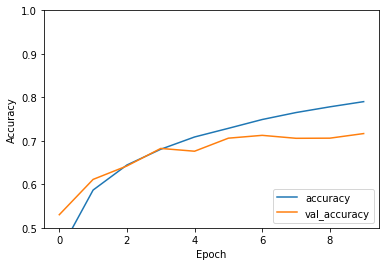

In [10]:
# TODO 3 - Here we are evaluating the model.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
# Print the test accuracy.
print(test_acc)

0.71670001745224


Our simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, see an example using the Keras subclassing API and a `tf.GradientTape` [here](https://www.tensorflow.org/tutorials/quickstart/advanced).